<a href="https://colab.research.google.com/github/Yanasla/PyGraph/blob/master/1_%D0%B4%D0%B5%D0%BD%D1%8C_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B0%D1%80%D1%85%D0%B8%D0%B2%D0%BE%D0%BC_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные взяты с сайта https://rp5.ru/Погода_в_Москве_(ВДНХ)

Ссылка на уже скачанный датасет https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true

Ссылка на вебинар
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-znakomimsya-s-python301120/


In [1]:
# Для подключения дополнительной функциональность нужно "импортнуть" библиотеки
# + магическая инструкция для отрисовки графиков внутри кода
import matplotlib.pyplot as plt
%matplotlib inline

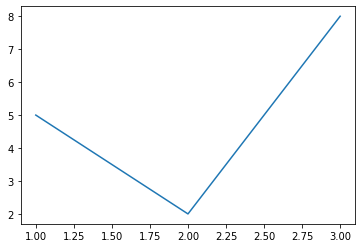

In [2]:
x = [1, 2, 3]
y = [5, 2, 8]

plt.plot(x, y)

Text(0, 0.5, 'Y')

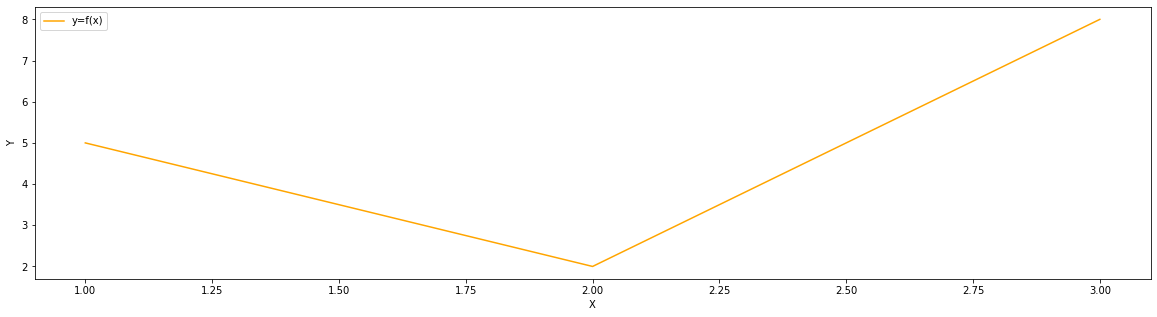

In [3]:
x = [1, 2, 3]
y = [5, 2, 8]

plt.figure(figsize=(20, 5))  # увеличиваем график, параметр в дюймах
plt.plot(x, y, label='y=f(x)', color='orange')
plt.legend()  # визуализирует легенду графика
plt.xlabel('X')
plt.ylabel('Y') # Подписываем оси

In [8]:
import pandas as pd

In [11]:
# комментарии вначале удалим (6 строк)
data = pd.read_excel('https:\\github.com\Yanasla\PyGraph\blob\master\Vinogradovo_01-01-19_23-12-21.xls',
                     skiprows=6)

URLError: ignored

In [6]:
data

NameError: ignored

In [ ]:
# DataFrame - колоночный формат данных, координаты берутся сначала по названию колонки, потом по номеру строки

In [ ]:
data.columns  # Список колонок

Index(['Местное время в Херсоне (метеостанция)', 'T', 'Po', 'P', 'Pa', 'U',
       'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl',
       'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [ ]:
data['Местное время в Херсоне (метеостанция)']  # взяли отдельную колонку

0       23.12.2021 14:00
1       23.12.2021 11:00
2       23.12.2021 08:00
3       23.12.2021 05:00
4       23.12.2021 02:00
              ...       
8693    01.01.2019 14:00
8694    01.01.2019 11:00
8695    01.01.2019 08:00
8696    01.01.2019 05:00
8697    01.01.2019 02:00
Name: Местное время в Херсоне (метеостанция), Length: 8698, dtype: object

In [ ]:
# Нумерация (индексация) начинается с нуля
data['Местное время в Херсоне (метеостанция)'][0]

'23.12.2021 14:00'

In [ ]:
data['T']

0       -7.8
1       -7.6
2      -10.0
3       -9.7
4       -9.9
        ... 
8693     0.5
8694    -0.8
8695    -1.4
8696    -1.4
8697    -1.2
Name: T, Length: 8698, dtype: float64

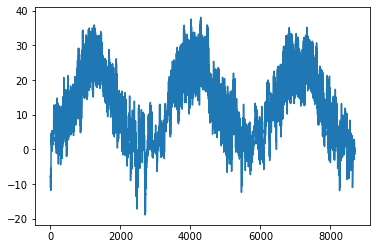

In [ ]:
x = data.index
y = data['T']

plt.plot(x, y)

In [ ]:
# Предобработка даных - приведение к нужному формату перед анализом
# 1) даты в формате строк - их нужно перевести в спец. внутренний формат

dates = pd.to_datetime(data['Местное время в Херсоне (метеостанция)'])

In [ ]:
dates

0      2021-12-23 14:00:00
1      2021-12-23 11:00:00
2      2021-12-23 08:00:00
3      2021-12-23 05:00:00
4      2021-12-23 02:00:00
               ...        
8693   2019-01-01 14:00:00
8694   2019-01-01 11:00:00
8695   2019-01-01 08:00:00
8696   2019-01-01 05:00:00
8697   2019-01-01 02:00:00
Name: Местное время в Херсоне (метеостанция), Length: 8698, dtype: datetime64[ns]

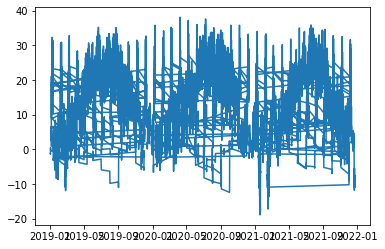

In [ ]:
# Попробуем отрисовать зависимость температуры от даты

x = dates
y = data['T']

plt.plot(x, y)

In [ ]:
# Все перемешалось. Почему?
# Данные в украинском формате - а функция читает их в американском, сначала месяц, потом день

# 2) зададим параметр, который указывает считывать день первым числом
dates = pd.to_datetime(data['Местное время в Херсоне (метеостанция)'], dayfirst=True)
# True, False - двоичные форматы, истина или ложь

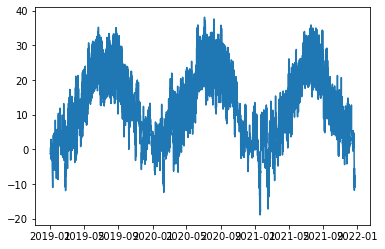

In [ ]:
x = dates
y = data['T']

plt.plot(x, y)

In [ ]:
# 3) Данные задом наперед - от новыз к старым. Завтра будем рисовать тренд и наруем его "задом-наперед", если это не исправить

# сортируем данные по значению

# сохраним новые даты в таблицу - добавим новый столбец

data['dates'] = dates

data

,Местное время в Херсоне (метеостанция),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,23.12.2021 14:00,-7.8,765.7,770.5,-0.6,61.0,"Ветер, дующий с северо-северо-запада",3,NaN,NaN,40%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,600-1000,"Высококучевые просвечивающие, полосами, либо о...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-14.0,Следы осадков,6.0,NaN,NaN,NaN,NaN,2021-12-23 14:00:00
1,23.12.2021 11:00,-7.6,766.3,771.1,0.3,70.0,"Ветер, дующий с северо-северо-запада",4,NaN,NaN,70 – 80%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 11:00:00
2,23.12.2021 08:00,-10.0,766.0,770.8,0.7,81.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,-11.5,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-12.7,NaN,NaN,NaN,NaN,Сухой рассыпчатый снег покрывает по крайней ме...,1,2021-12-23 08:00:00
3,23.12.2021 05:00,-9.7,765.3,770.1,-0.1,82.0,"Ветер, дующий с запада",2,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 05:00:00
4,23.12.2021 02:00,-9.9,765.4,770.2,0.3,82.0,"Ветер, дующий с юго-запада",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,01.01.2019 14:00,0.5,763.4,768.5,-2.2,87.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 14:00:00
8694,01.01.2019 11:00,-0.8,765.6,770.8,-0.6,93.0,"Ветер, дующий с востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 11:00:00
8695,01.01.2019 08:00,-1.4,766.2,771.4,0.2,96.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,-1.4,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 08:00:00
8696,01.01.2019 05:00,-1.4,766.0,771.2,-0.6,96.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 05:00:00


In [ ]:
# сортируем по новому столбцу
data.sort_values('dates')  # функция создает новую таблицу, а не меняет старую
data = data.sort_values('dates')  # перезаписали таблицу

In [ ]:
data

,Местное время в Херсоне (метеостанция),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
8697,01.01.2019 02:00,-1.2,766.6,771.7,0.6,96.0,"Ветер, дующий с севера",3,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 02:00:00
8696,01.01.2019 05:00,-1.4,766.0,771.2,-0.6,96.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 05:00:00
8695,01.01.2019 08:00,-1.4,766.2,771.4,0.2,96.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,-1.4,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 08:00:00
8694,01.01.2019 11:00,-0.8,765.6,770.8,-0.6,93.0,"Ветер, дующий с востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 11:00:00
8693,01.01.2019 14:00,0.5,763.4,768.5,-2.2,87.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,23.12.2021 02:00,-9.9,765.4,770.2,0.3,82.0,"Ветер, дующий с юго-запада",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 02:00:00
3,23.12.2021 05:00,-9.7,765.3,770.1,-0.1,82.0,"Ветер, дующий с запада",2,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 05:00:00
2,23.12.2021 08:00,-10.0,766.0,770.8,0.7,81.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,-11.5,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-12.7,NaN,NaN,NaN,NaN,Сухой рассыпчатый снег покрывает по крайней ме...,1,2021-12-23 08:00:00
1,23.12.2021 11:00,-7.6,766.3,771.1,0.3,70.0,"Ветер, дующий с северо-северо-запада",4,NaN,NaN,70 – 80%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 11:00:00


In [ ]:
# 4) исправляем нумерацию строк - "сбрасываем" индекс
data = data.reset_index()

In [ ]:
data

,index,Местное время в Херсоне (метеостанция),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,8697,01.01.2019 02:00,-1.2,766.6,771.7,0.6,96.0,"Ветер, дующий с севера",3,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 02:00:00
1,8696,01.01.2019 05:00,-1.4,766.0,771.2,-0.6,96.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 05:00:00
2,8695,01.01.2019 08:00,-1.4,766.2,771.4,0.2,96.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,-1.4,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 08:00:00
3,8694,01.01.2019 11:00,-0.8,765.6,770.8,-0.6,93.0,"Ветер, дующий с востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,2.0,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 11:00:00
4,8693,01.01.2019 14:00,0.5,763.4,768.5,-2.2,87.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,4,23.12.2021 02:00,-9.9,765.4,770.2,0.3,82.0,"Ветер, дующий с юго-запада",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 02:00:00
8694,3,23.12.2021 05:00,-9.7,765.3,770.1,-0.1,82.0,"Ветер, дующий с запада",2,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 05:00:00
8695,2,23.12.2021 08:00,-10.0,766.0,770.8,0.7,81.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,,NaN,NaN,-11.5,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-12.7,NaN,NaN,NaN,NaN,Сухой рассыпчатый снег покрывает по крайней ме...,1,2021-12-23 08:00:00
8696,1,23.12.2021 11:00,-7.6,766.3,771.1,0.3,70.0,"Ветер, дующий с северо-северо-запада",4,NaN,NaN,70 – 80%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-12.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23 11:00:00


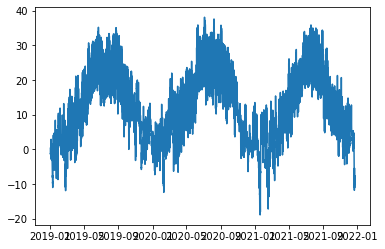

In [ ]:
x = data['dates']
y = data['T']

plt.plot(x, y)

In [ ]:
# Выбор диапазона по условию

start = pd.Timestamp(day=1, month=1, year=2019)  # задали ограничивающую дату
condition = data['dates'] > start
data[condition]

# одной строкой создадим новую табличку
data_short = data[data['dates'] > pd.Timestamp(day=1, month=7, year=2019)]

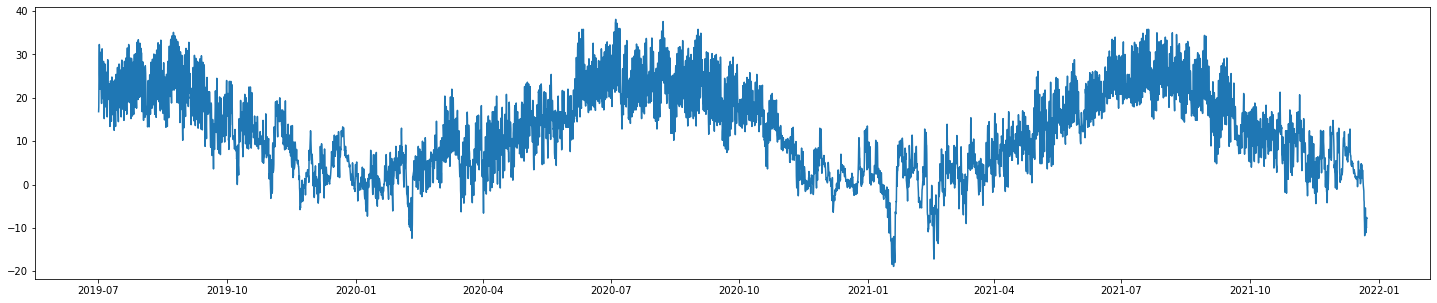

In [ ]:
x = data_short['dates']
y = data_short['T']

plt.figure(figsize=(25, 5))
plt.plot(x, y)

In [ ]:
# Упражнение: отрисовать график с 1 июня 2019 по 30 сентября 2021 (необязательное)
# есть много идентичных способов, все они верны
# задача решается комбинацией приемов, показанных ранее

In [ ]:
# Выбор диапазона по условию

start = pd.Timestamp(day=1, month=6, year=2019)  # задали ограничивающую дату
fin = pd.Timestamp(day=30, month=9, year=2019)
condition = (data['dates'] > start) and (data['dates'] < fin)
data[condition]

# одной строкой создадим новую табличку
data_short = data[data['dates'] > pd.Timestamp(day=1, month=7, year=2019)]